In [2]:
import numpy as np 
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)

In [3]:
def translate_matrix(a,b):
    return np.vstack(([1,0,a],[0,1,b],[0,0,1]))

In [4]:
def rotate_matrix(theta):
    return np.vstack(([np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1])) 

In [5]:
def reflect_line(a,b,c):
    return np.vstack([[b**2-a**2,-2*a*b,-2*a*c],[-2*a*b,a**2-b**2,-2*b*c],[0,0,a**2+b**2]])

In [6]:
def printMatrix(a,custom_color):
    #plt.xlim(0,1.5)
    plt.plot(a[0],a[1], 'k-,')
    plt.fill(a[0], a[1], color=custom_color)

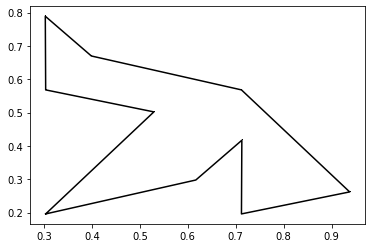

In [7]:
"""Original coordinates 
(0.3036, 0.1960), (0.6168, 0.2977), (0.7128,
0.4169), (0.7120, 0.1960), (0.9377, 0.2620), (0.7120, 0.5680), (0.3989, 0.6697), (0.3028,
0.7889), (0.3036, 0.5680), and (0.5293, 0.5020).
"""

# added last vector to connect first and last point since we will have to transform the added line segment anyways
x=[0.3036,0.6168,0.7128,0.7120,0.9377,0.7120,0.3989,0.3028,0.3036,0.5293,0.3036]
y=[0.1960,0.2977,0.4169,0.1960,0.2620,0.5680,0.6697,0.7889,0.5680,0.5020,0.1960]
#adding a row of 1 to make the matrix compatiable with homogenous transformations
z=11*[1]
#combining the rows into a single matrix: A

A=np.vstack((x,y,z))
#plotting the bird 
printMatrix(A,"w")


To find the matrix of transformation that rotates the bird tile around the point (.7120,.4320) we must first calculate the translation matrix  That moves the tile to the origin from the desired rotation point. : 

 $$\begin{bmatrix}1&0&-.7120\\0&1&-.432\\0&0&1\end{bmatrix}$$
    
 Next we must find the rotation matrix about the z axis for theta = $\pi$: 
 
 $$\begin{bmatrix} \cos(\pi)&-\sin(\pi)&0\\\sin(\pi)&\cos(\pi)&0\\0&0&1\end{bmatrix}\sim \begin{bmatrix}-1&0&0\\0&-1&0\\0&0&1\end{bmatrix}$$
 
 Finally we want to translate the matrix back to the desired point 
  $$\begin{bmatrix}1&0&.7120\\0&1&.432\\0&0&1\end{bmatrix}$$

$$\begin{bmatrix}1&0&.7120\\0&1&.432\\0&0&1\end{bmatrix}\begin{bmatrix}-1&0&0\\0&-1&0\\0&0&1\end{bmatrix}\begin{bmatrix}1&0&-.7120\\0&1&.-432\\0&0&1\end{bmatrix}=\begin{bmatrix}-1&0&1.424\\0&-1&.864\\0&0&1\end{bmatrix}$$

$$T(a,b)R(\pi)T(-a,-b)x$$

In [8]:
def generate_first_Tile(A,theta,a,b):
 
    #generate matrices for transformation
    t1=translate_matrix(a,b)
    r=rotate_matrix(theta)
    t2=translate_matrix(-a,-b)
    
    #combine matricies 
    T=np.matmul(r,t2)
    T=np.matmul(t1,T)
    return np.matmul(T,A)

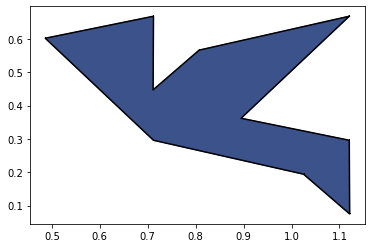

In [9]:
#plot original bird tile
#declare constants 
theta=np.pi
a=.7120
b=.4320

A1=generate_first_Tile(A,theta,a,b)
#print modified bird (Tile1)
printMatrix(A1,"#3b528b")



### Second transformation
For the second transformation we must first use a tranlation matrix to augment the position of the starting bird then use a relfection matrix over the y axis to obbserve the desired effect. 

In [10]:
def generate_second_Tile(A,a,b,c,t1,t2):
    r=reflect_line(a,b,c)
    t=translate_matrix(t1,t2)
    T=np.matmul(r,t)
    return np.matmul(T,A)

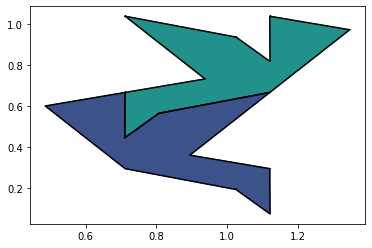

In [11]:
A2=generate_second_Tile(A,0,1,-.6180,.4084,0)
#print modified bird (Tile1)
printMatrix(A1,"#3b528b")
#print modified bird (Tile1)
printMatrix(A2,"#21918c")


## Third transformation

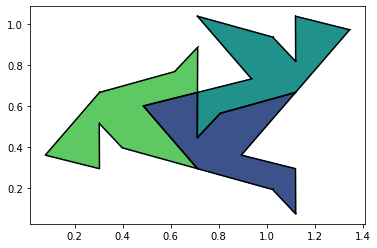

In [12]:
A3=generate_second_Tile(A,1,0,-.5078,0,.1)
#print modified bird (Tile1)
printMatrix(A1,"#3b528b")
#print modified bird (Tile2)
printMatrix(A2,"#21918c")
#print modified bird (Tile3)
printMatrix(A3,"#5ec962")

## Fourth Transformation

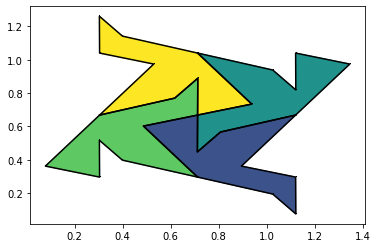

In [13]:
t=translate_matrix(0,.4720)
A4=np.matmul(t,A)

#print modified bird (Tile1)
printMatrix(A1,"#3b528b")

#print modified bird (Tile2)
printMatrix(A2,"#21918c")

#print modified bird (Tile3)
printMatrix(A3,"#5ec962")

#print modified bird (Tile4)
printMatrix(A4,"#fde725")

In [14]:
def plot_bird_cell(c1,c2):
    x=[0.3036,0.6168,0.7128,0.7120,0.9377,0.7120,0.3989,0.3028,0.3036,0.5293,0.3036]
    y=[0.1960,0.2977,0.4169,0.1960,0.2620,0.5680,0.6697,0.7889,0.5680,0.5020,0.1960]
    #adding a row of 1 to make the matrix compatiable with homogenous transformations
    z=11*[1]
    #combining the rows into a single matrix: A
    A=np.vstack((x,y,z))
    
    #First tile 
    A1=generate_first_Tile(A,np.pi,.7120,.4320)
    #Second Tile
    A2=generate_second_Tile(A,0,1,-.6180,.4084,0)
    #Third tile
    A3=generate_second_Tile(A,1,0,-.5078,0,.1)
    #Fourth tile
    t=translate_matrix(0,.4720)
    A4=np.matmul(t,A)
    
    #Apply transformation:
    T=translate_matrix(c1,c2)    
    A1=np.matmul(T,A1)
    A2=np.matmul(T,A2)
    A3=np.matmul(T,A3)
    A4=np.matmul(T,A4)
    
    #print modified bird (Tile1)
    printMatrix(A1,"#3b528b")
    printMatrix(A2,"#21918c")
    printMatrix(A3,"#5ec962")
    printMatrix(A4,"#fde725")

In [15]:
def tesselate_birds(horz,vert,a,b):
    for i in range(1,horz):
        for j in range(1,vert):
            plot_bird_cell(a*i,b*j)

<IPython.core.display.Javascript object>


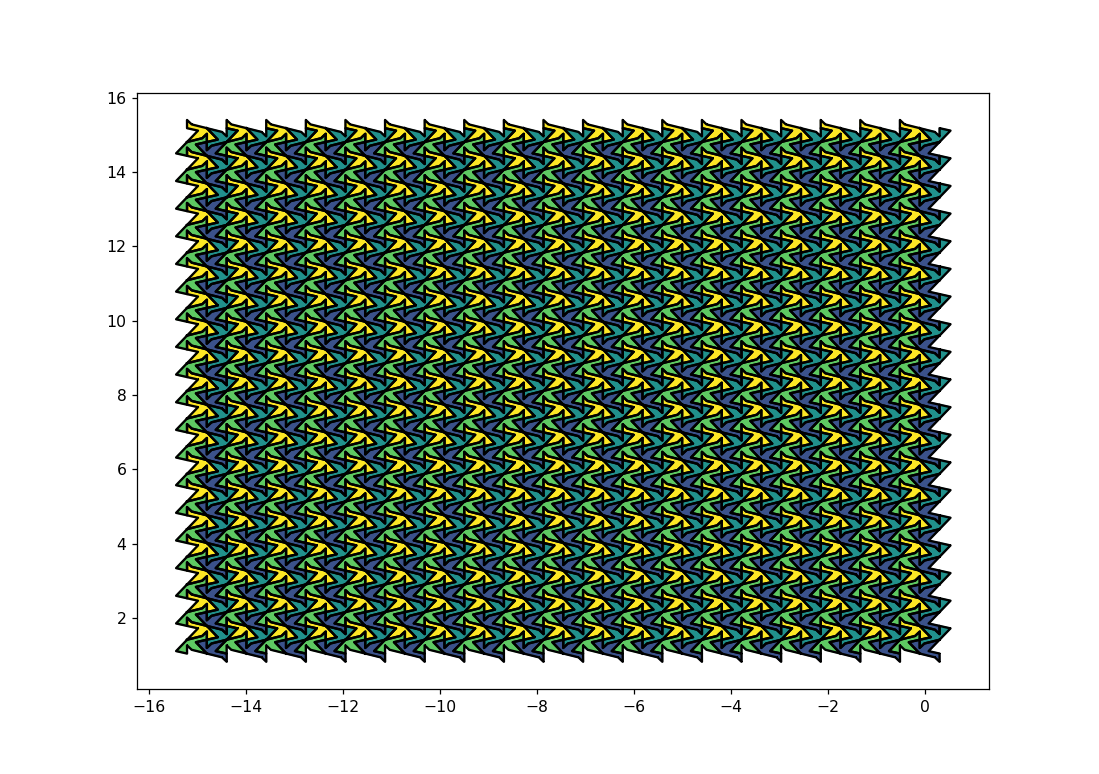

In [20]:
%matplotlib notebook
tesselate_birds(20,20,-.8168,.7441)